# 1. Installing all libraries and packages

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# 2. Loading the dataset
I have taken datasets directly from keras as I'm familiar with keras datasets by reading the documentations of keras and it matches with the given dataset. Although in the evaluation part in `evaluation_model.py` I've added the path file for clarity.

In [39]:
f_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

# 3. Data Exploration
Explored the dataset and found out a total of `10 class` labels and named them below

In [40]:
class_names = [ 'T-shirt', 'Trousers', 'Pullovers', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [41]:
train_images.shape

(60000, 28, 28)

In [42]:
test_images.shape

(10000, 28, 28)

In [43]:
train_labels.shape

(60000,)

# 4. Preprocessing
Generating/ visualizing an example of 1st train images below:


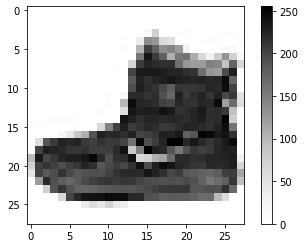

In [44]:
plt.figure()
plt.imshow(train_images[0], cmap = 'Greys')
plt.colorbar()
plt.gca().grid(False)

## 4.1 Feature Scaling

In [45]:
train_images = train_images / 255.0
test_images = test_images / 255.0

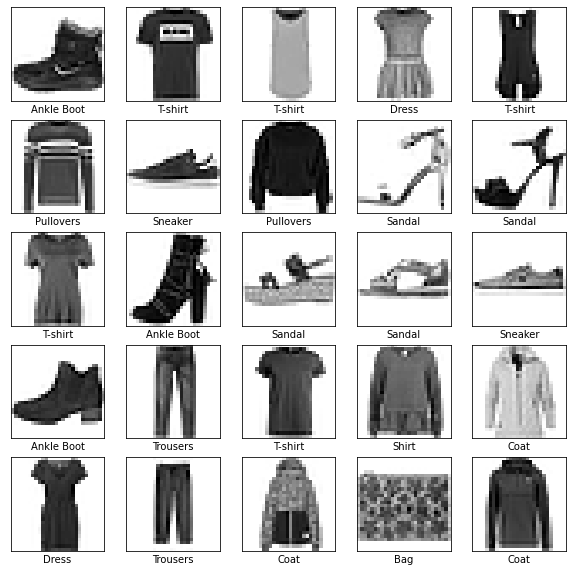

In [46]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

# 5. Model Building through CNN

## 5.1 Creating the model

In [61]:

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, (3, 3), strides=(2,2), padding='same', activation='relu', input_shape=(28, 28, 1)),
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         36992     
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               802944    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      

## 5.2 Compiling the model

In [63]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## 5.3 Fitting the model

In [64]:
model.fit(train_images, train_labels, epochs= 7)

Epoch 1/7
1875/1875 [==============================] - 32s 16ms/step - loss: 0.3909 - accuracy: 0.8593
Epoch 2/7
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2547 - accuracy: 0.9053
Epoch 3/7
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2079 - accuracy: 0.9234
Epoch 4/7
1875/1875 [==============================] - 33s 17ms/step - loss: 0.1730 - accuracy: 0.9355
Epoch 5/7
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1425 - accuracy: 0.9474
Epoch 6/7
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1145 - accuracy: 0.9576
Epoch 7/7
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0931 - accuracy: 0.9656


## 5.4 Evaluation of accuracy and finalising

In [66]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f"Test accuracy of the model is {test_accuracy} or {round(test_accuracy*100,2)}%")

313/313 [==============================] - 2s 5ms/step - loss: 0.2666 - accuracy: 0.9213
Test accuracy of the model is 0.9212999939918518 or 92.13%


- It's a generalized model **not overfit nor underfit**

# 6. Make predictions on all(TESTING MODEL)

In [67]:
preds = model.predict(test_images)

313/313 [==============================] - 1s 4ms/step


- I'm taking the 8th test_image and predicting it

In [68]:
preds[7]

array([2.8796405e-08, 1.1187524e-11, 3.6803343e-05, 7.8516030e-07,
       1.7308629e-04, 8.1548351e-11, 9.9978918e-01, 1.9289133e-11,
       1.8658675e-09, 3.9258895e-11], dtype=float32)

In [69]:
np.argmax(preds[7])

6

In [70]:
test_labels[7]

6

# 7. Visualization & Analysis

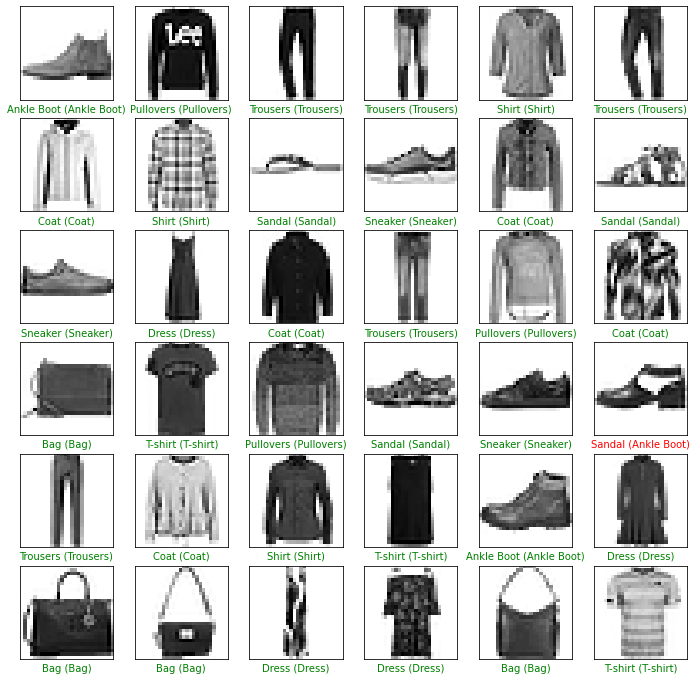

In [71]:

plt.figure(figsize=(12, 12))
for val in range(36):
    plt.subplot(6, 6, val + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[val], cmap=plt.cm.binary)
    pred_label = np.argmax(preds[val])
    true_label = test_labels[val]

    if pred_label == true_label:
        text_color = 'green'
    else:
        text_color = 'red'
    
    plt.xlabel(f"{class_names[pred_label]} ({class_names[true_label]})", color=text_color)

plt.show()


## 7.1 Confusion Matrix

<AxesSubplot:>

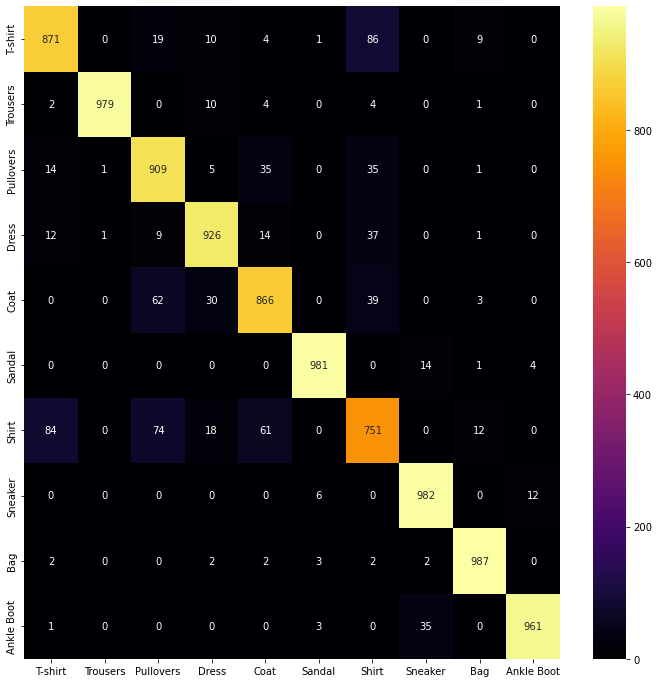

In [72]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize = (12,12))
matrix_pred = [np.argmax(label) for label in preds]
conf_matrix = confusion_matrix(test_labels, matrix_pred)

#viz
sns.heatmap(conf_matrix, cmap= 'inferno', annot= True, fmt = 'd', xticklabels= class_names, yticklabels = class_names)

## 7.2 Classification of various matrices

In [73]:
from sklearn.metrics import classification_report
report = classification_report(test_labels, matrix_pred, target_names = class_names)
print(report)

              precision    recall  f1-score   support

     T-shirt       0.88      0.87      0.88      1000
    Trousers       1.00      0.98      0.99      1000
   Pullovers       0.85      0.91      0.88      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.88      0.87      0.87      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.79      0.75      0.77      1000
     Sneaker       0.95      0.98      0.97      1000
         Bag       0.97      0.99      0.98      1000
  Ankle Boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



`Shirt` is lesser but also is predicted good while prediction of `Trousers` are the highest

# 8. Saving the model


In [74]:
model.save('model_nitex_task.h5')

In [75]:
deploy = keras.models.load_model('model_nitex_task.h5')

- testing our deployment

In [76]:
pred_after_save = deploy.predict(test_images).round(2)

313/313 [==============================] - 1s 4ms/step


In [77]:
np.argmax(pred_after_save)

9